Rank Filters for Image Processing
=================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour explores non-linear local filters that proceeds by
ordering the pixels in a neighboorhood and selecting a given ranked
entry.

In [34]:
using PyPlot
using NtToolBox

Continuous Rank Filtering
-------------------------
We consider an image $f : [0,1]^2 \rightarrow \RR$.


For any $\beta \in [0,1]$, we define the rank filter
$\phi_\be^B$ of order $\beta$ associated to a set $B$ to be
$$ g = \phi_\beta^B(f)
  \qwhereq
  g(x) = \inf \: \enscond{t \in \RR}{
          \mu( f^{-1}(]-\infty,t]) \cap x+B ) \geq \mu(B)/2 }. $$
where $\mu$ is the Lebesgue measure on $\RR$.


One usually assumes that $B$ is the ball of radius $\epsilon>0$
$$ B = B_\epsilon = \enscond{x}{\norm{x} \leq \epsilon}. $$


When $\be=0$ (resp. $\be=1$, resp.
$\be=1/2$), then $g(x)$ is the miniminimum
(resp. maximum, resp. median) value of $f$ in a small neighboorhood of
radius $\epsilon$
$$ \phi_0^{B_\epsilon}(f)(x) = \umin{\norm{y-x} \leq \epsilon} f(y), $$
$$ \phi_{1/2}^{B_\epsilon}(f)(x) = \umax{\norm{y-x} \leq \epsilon} f(y), $$
$$ \phi_{1}^{B_\epsilon}(f)(x) = \underset{\norm{y-x} \leq \epsilon}{\text{median}} f(y). $$


The operator $\phi_\beta^B$ is contrast-invariant, meaning that it
computes with increasing functions $ \psi : \RR \rightarrow \RR $
$$ \phi_\beta^B \circ \psi = \psi \circ \phi_\beta^B. $$
The axiomatic study of contrast invariant operator was initiated in the
comunity of mathematical morphology, see [Matheron75](#biblio), [Tukey77](#biblio), [Serra82](#biblio).


Note also that there exist generalization of rank filters (and in
particular the median filter) to vector valued images
$ f : [0,1]^2 \rightarrow \RR^d$. Since the notion of rank does not
exists anymore, one has to rely on variational caracteriation of the
median, see for instance [CasSapChu00](#biblio).


The medial filtering is the most popular rank filter.
It is particularly efficient to remove impulse noise,
see for instance [Piterbarg84](#biblio), [FanHall94](#biblio).
See also [AriasDon99](#biblio) for a theoritical analysis of median
filtering and of a two-stage iterated version.

Patches in Images
-----------------
We apply rank filters to discretized images by interpreting them as
piecewise constant functions.


Size $N = n \times n$ of the image.

In [35]:
n = 256;

We load an image $f_0 \in \RR^N$.

In [36]:
f0 = load_image("NtToolBox/src/data/hibiscus.png", n);

Display $f_0$.

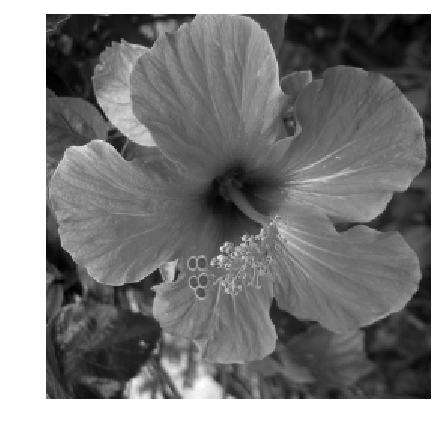

In [37]:
figure(figsize = (5,5))
imageplot(f0)

Noise level $\si$.

In [38]:
sigma = .04;

Generate a noisy image $f=f_0+\epsilon$ where $\epsilon \times
\Nn(0,\si^2\text{Id}_N)$.

In [39]:
using Distributions
f = f0 .+ sigma.*rand(Normal(), n, n);

Display $f$.

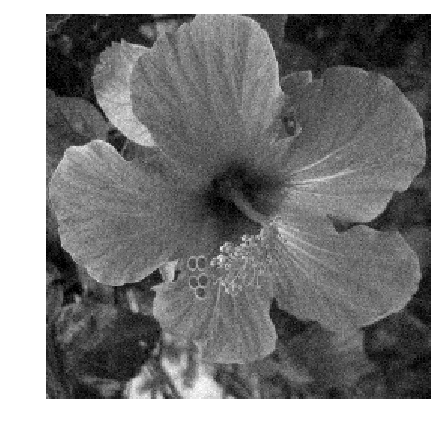

In [40]:
figure(figsize = (5,5))
imageplot(clamP(f))

For simplicity, we consider the case where
the set $B$ is a square of $w_1 \times w_2$ pixels.
where we denote $w$ to be the half width of the patches,
and $w_1=2w+1$ the full width.

In [41]:
w = 3
w1 = 2*w + 1;

We define the patch extraction operator
$$ p = p_x(f) \in \RR^{w_1 \times w_1}
\qwhereq \forall -w \leq s_1,s_2 \leq w, \quad p(s) = f(x+s). $$


We now define the function $\Pi(f) = (p_x(f))_x $
that extracts all possible patches.


We set up large $(n,n,w_1,w_1)$ matrices to index the the X and Y
position of the pixel to extract.

In [43]:
include("NtToolBox/src/ndgrid.jl")

(X, Y) = meshgrid(1 : n, 1 : n)
(dX, dY) = meshgrid(-w : w, -w : w)

dX = reshape(dX, (1, 1, w1, w1))
dY = reshape(dY, (1, 1, w1, w1))
X = repeat(X, inner = [1, 1, w1, w1]) + repeat(dX, inner = [n, n, 1, 1])
Y = repeat(Y, inner = [1, 1, w1, w1]) + repeat(dY, inner = [n, n, 1, 1]);

We handle boundary condition by reflexion.

In [44]:
X[X .< 1] = 2 .- X[X .< 1] 
Y[Y .< 1] = 2 .- Y[Y .< 1]
X[X .> n] = 2*n .- X[X .> n]
Y[Y .> n] = 2*n .- Y[Y .> n];

Patch extractor operator $\Pi$.

In [46]:
I = X + (Y-1)*n
for i in 1 : Base.div(n, w)
    for j in 1 : Base.div(n, w)
        I[i, j, :, :] = transpose(I[i, j, :, :])
    end
end
        
Pi = f -> reshape(f[I], (n, n, w1*w1))
Pi(f);

We store the patches $\Pi(f)$ as a $n \times n \times w_1^2$ matrix $P$
such that, for each pixel $x$, $P(x)$ is a vector of size $w_1^2$
storing the entries of $p_x(f)$.

In [47]:
P = Pi(f);

Display some example of patches.

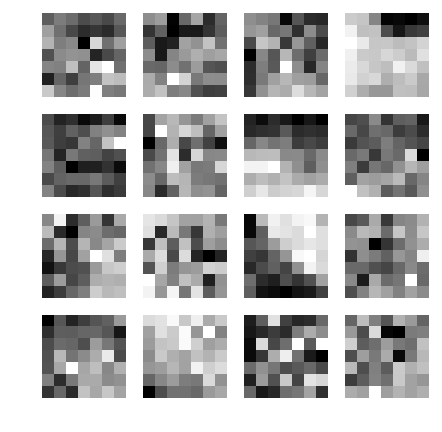

In [48]:
figure(figsize = (5,5))

for i in 1:16
    x = rand(1:n)
    y = rand(1:n)
    imageplot(reshape(P[x, y, :], (w1, w1)), "", [4, 4, i])
end

Linear Filter
-------------
A linear filter (convolution) can be computed using this patch
representation as
$$ g(x) = \sum_{i} \la_i p_x(f)_i.  $$


In the case where $\la_i=1/w_1^2$, this
defines the mean value inside the patch:
$$ g(x) = \frac{1}{w_1^2} \sum_{i} p_x(f)_i.  $$

In [49]:
Pmean = f -> mean(Pi(f), 3)
Pmean(f);

Display it.

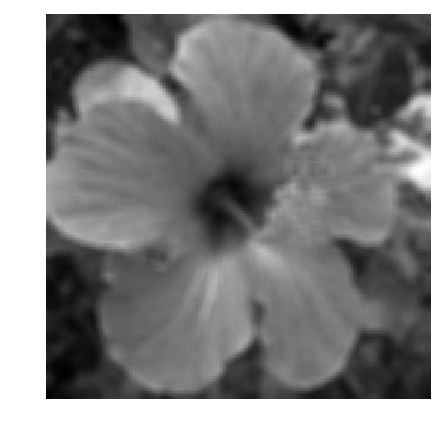

In [50]:
figure(figsize = (5,5))
imageplot(Pmean(f)[:, :])

Note that this is not a rank filter (this a linear filter) and that it is
not contrast invariant. This is shown by displaying
$$ \phi_\beta^B(f) - \psi^{-1} \circ \phi_\beta^B \circ \psi(f) $$
which is non-zero.

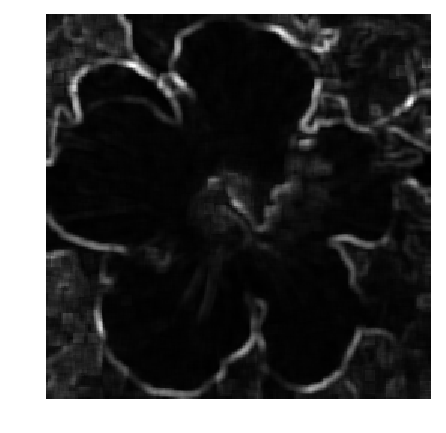

In [51]:
p = 100
psi = f -> f.^(1/p)
ipsi = f -> f.^p

figure(figsize = (5,5))
imageplot(Pmean(abs(f))[:, :] - ipsi(Pmean(psi(abs(f))))[:, :])

Opening and Closing Rank Filters
--------------------------------
We now come back to the discrete computation of a rank filter $\phi_\be^B$
for $B$ a square of width $w_1 \times w_1$ pixels.


It is defined as $g=\phi_\beta^B(f)$ where
$$ g(x) = \text{rank}_{r(\beta)}( p_x(f) ) $$
where $\text{rank}_r(v)$ extracted the element of order $k$ in the
sorted value of $v \in \RR^Q$ (here $Q=w_1^2$). More precisely, we denote
$$ v_{\si(1)} \leq v_{\si(2)} \leq \ldots \leq v_{\si(Q)} $$
where $\si \in \Sigma_Q$ is an ordering permutation, which can be
computed in $ O(N \log(N)) $ operations with the QuickSort algorithm.
Then the ranked valued is
$$ \text{rank}_r(v) = v_{\si(r)}. $$


In order to be consistent with the continuous definition of the
rank filter, one should define the rank as
$$ r=r(\beta) = \lfloor Q r \rfloor. $$

In [52]:
r = beta -> min(ceil(beta*w1*w1), w1*w1 - 1)

(::#35) (generic function with 1 method)

Shortcut for the rank filter.

In [53]:
subsample = (x, s) -> x[: , : , s]
phi = (f, beta) -> subsample(sort(Pi(f), 3), Int(r(beta)) + 1)

(::#39) (generic function with 1 method)

__Exercise 1__

Compute the rank filter for several values of $\beta$.

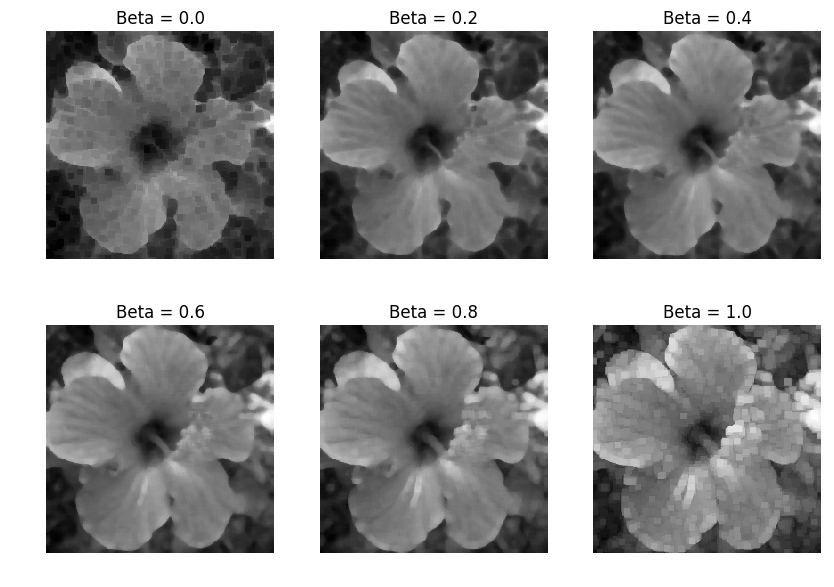

In [54]:
include("NtSolutions/denoisingadv_7_rankfilters/exo1.jl")

In [55]:
## Insert your code here.

The case $\beta=0$ corresponds to the closing operator from
mathematical morphology (min filter).

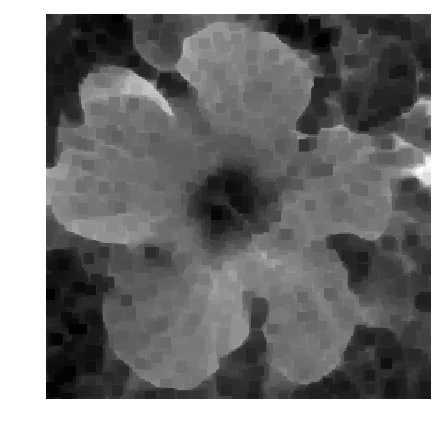

In [56]:
closing = f -> phi(f, 0)
figure(figsize = (5,5))
imageplot(closing(f))

The case $\beta=1$ corresponds to the opening operator from
mathematical morphology (max filter).

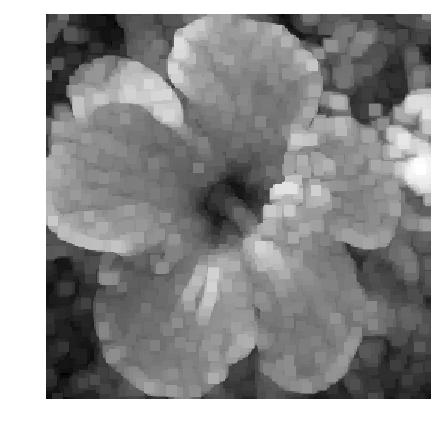

In [57]:
opening = f -> phi(f, 1)
figure(figsize = (5,5))
imageplot(opening(f))

__Exercise 2__

Compute a closing followed by an opening.

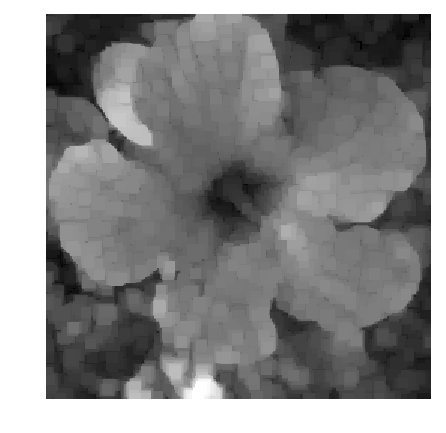

In [58]:
include("NtSolutions/denoisingadv_7_rankfilters/exo2.jl")

In [59]:
## Insert your code here.

__Exercise 3__

Compute an opening followed by a closing.

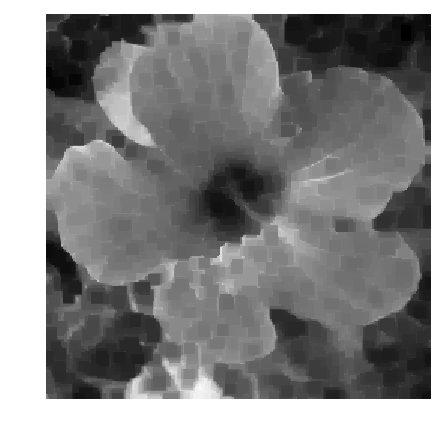

In [60]:
include("NtSolutions/denoisingadv_7_rankfilters/exo3.jl")

In [61]:
## Insert your code here.

__Exercise 4__

Perform iterated opening and closing.

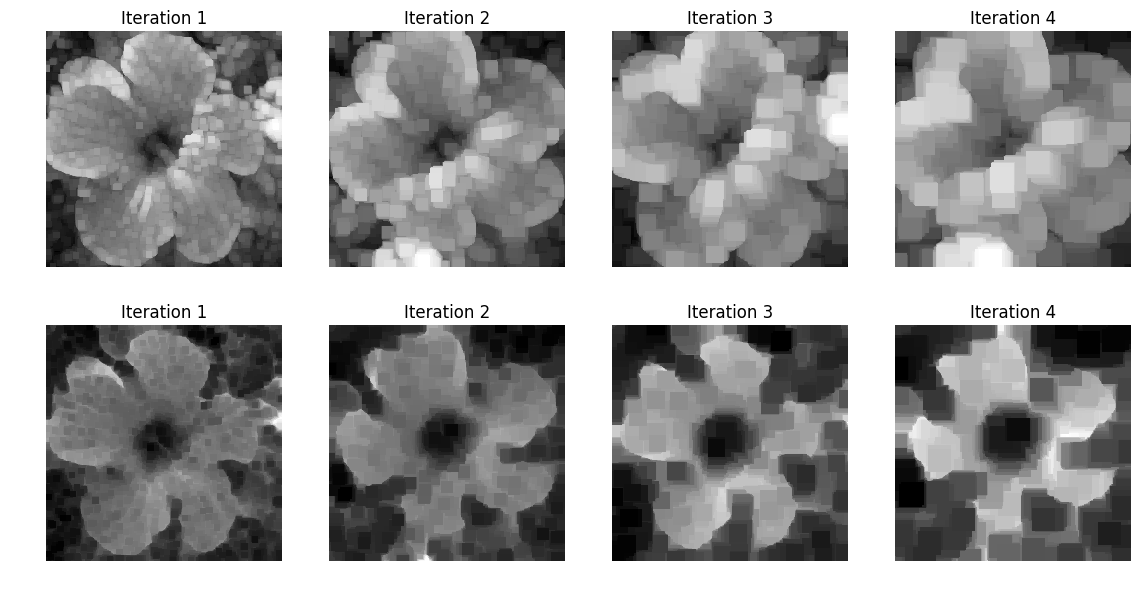

In [62]:
include("NtSolutions/denoisingadv_7_rankfilters/exo4.jl")

In [63]:
## Insert your code here.

Median Filter
-------------
The median filter corresponds to the case where $\be=1/2$.

In [64]:
medfilt = f -> phi(f, 1/2)
medfilt(f);

Display the result.

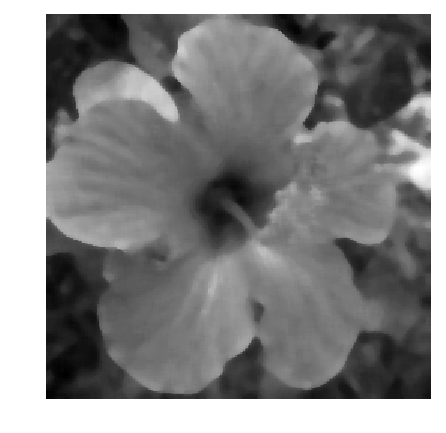

In [65]:
figure(figsize = (5,5))
imageplot(medfilt(f))

Iterated median filtering computes
$$ f^{(\ell+1)} = \phi_{1/2}^B( f^{(\ell)} ). $$

In the case where $f$ is of class $C^3$ and $\nabla f(x) \neq 0$,
one has the following Taylor expansion
$$ \phi_{1/2}^{B_\epsilon}(x) =
  f(x) + \frac{\epsilon^2}{6} \norm{\nabla f(x)}
      \text{Curv}(f)(x) + O(\epsilon^{7/3}) $$
where the curvature operator is
$$ \text{Curv}(f) = \text{div}\pa{
      \frac{\nabla f}{\norm{\nabla f}}
  }. $$


Intuitively, it means that if one iterates the operator
$ \phi_{1/2}^{B_\epsilon} $ with a proper re-scaling $\ell \leftrightarrow t$
and when
$\epsilon \rightarrow 0$, then $f^{(\ell)}$ tends to the solution to the
famous mean-curvature motion PDE
$$ \pd{f}{t} = \norm{\nabla f} \text{Curv}(f).  $$


This conjecture was initially mentionned in [BeMerOsh92](#biblio).
This was rigorously proved in [Ishii95](#biblio), [BarGeorg](#biblio),
[Evans93](#biblio) using the machinery of viscosity solutions.


Similar result holds for other class of contrast invariant operator, see
for instance [Cao98](#biblio) for affine invariant operators, and [GuiMoRy04](#biblio)
for an axiomatic and general framework.

__Exercise 5__

Perform iterated median filtering, and store the output in $f_1$.

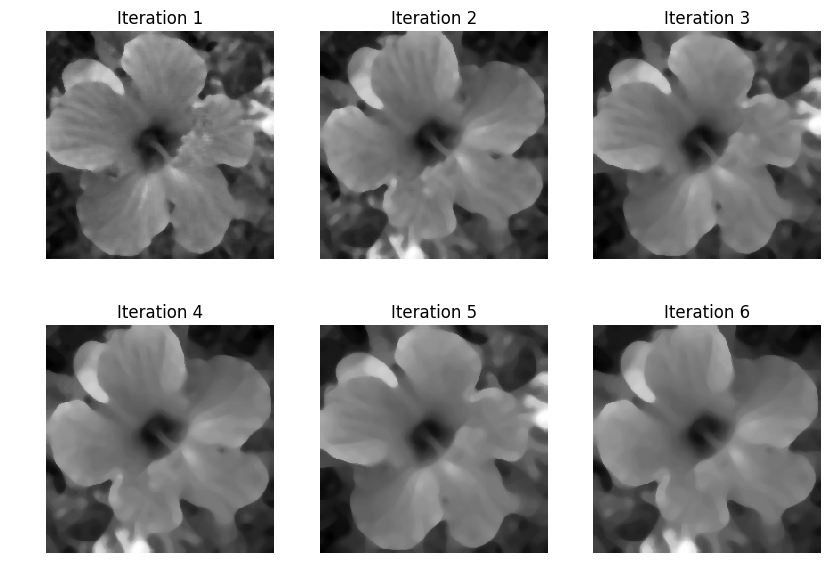

In [66]:
include("NtSolutions/denoisingadv_7_rankfilters/exo5.jl")

In [67]:
## Insert your code here.

Display.

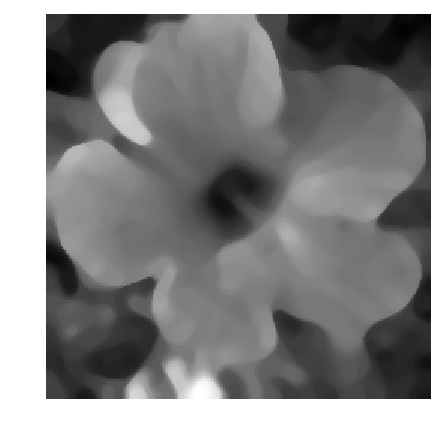

In [68]:
figure(figsize = (5,5))
imageplot(f1)

Bibliography
------------
<html><a name="biblio"></a></html>


* [Matheron75] G. Matheron, [Random Sets and Integral Geometry][1], Wiley, New York, 1975
* [Serra82] J. Serra, [Image Analysis and Mathematical Morphology][2], Academic Press, London, 1982
* [Tukey77] J. W. Tukey, [Exploratory Data Analysis][3]. Addison-Wesley, Reading, MA, 1977
* [BeMerOsh92] J. Bence, B. Merriman, S. Osher, [Diffusionn generated motion by mean curvature][4], Selected Lectures in Math. Amer. Math. Soc., Providence, 1992
* [Cao98] F. Cao, [Partial differential equations and mathematical morphology][5]. J.Math. Pures Appl. 77 909?941, 1998
* [Ishii95] H. Ishii, _A generalization of the Bence, Merriman and Osher algorithm for motion by mean curvature_, 1995
* [BarGeorg] G. Barles and C. Georgelin, [A Simple Proof of Convergence for an Approximation Scheme for Computing Motions by Mean Curvature][6], SIAM J. Numer. Anal., 32(2), 484?500, 1995.
* [Evans93] L. C. Evans, [Convergence of an algorithm for mean curvature motion][7], Indiana Univ. Math. J., 42, pp. 533?557, 1993.
* [GuiMoRy04] F. Guichard, J-M. Morel and Robert Ryan, _Contrast invariant image analysis and PDE's_, 2004.
* [CasSapChu00] V. Caselles, G. Sapiro and D. H. Chung, [Vector median filters, inf-sup operations, and coupled PDEs: Theoretical connections][8]. J. Math. Imaging Vision 12 109?119, 2000
* [Piterbarg84] L. I. Piterbarg, [Median filtering of random processes][9], Problemy Peredachi Informatsii, 20, 65?73, 1984.
* [FanHall94] J. Fan and P. Hall, [On curve estimation by minimizing mean absolute deviation and its implications][10]. Ann. Statist. 22 867?885, 1994.
* [AriasDon99] E. Arias-Castro and D. L. Donoho, [Does the median filter truly preserve edges better than linear filtering?][11], The Annals of Statistics, Vol. 37, No. 3, 1172-1206, 2009.



[1]:http://books.google.fr/books/about/Random_sets_and_integral_geometry.html?hl=fr&id=bgzvAAAAMAAJ
[2]:http://dl.acm.org/citation.cfm?id=1098652
[3]:http://books.google.fr/books/about/Exploratory_Data_Analysis.html?hl=fr&id=UT9dAAAAIAAJ
[4]:http://books.google.fr/books/about/Diffusion_Generated_Motion_by_Mean_Curva.html?id=DYi-GwAACAAJ&redir_esc=y
[5]:http://dx.doi.org/10.1016/S0021-7824(01)80003-9
[6]:http://dx.doi.org/10.1137/0732020
[7]:http://cat.inist.fr/?aModele=afficheN&cpsidt=3899933
[8]:http://dx.doi.org/10.1023/A:1008310305351
[9]:http://www.mathnet.ru/php/archive.phtml?wshow=paper&jrnid=ppi&paperid=1122&option_lang=eng
[10]:http://dx.doi.org/10.1214/aos/1176325499
[11]:http://dx.doi.org/10.1214/08-AOS604